<h1>🚔📊 CHICAGO CRIMES DATA ANALYTICS  ||  MIDTERM EXAM </h1><hr>
<h2>Analyst: Aaron Faderagao</h2>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

<img src='https://cdn.choosechicago.com/uploads/2019/06/general-contact.jpg'>

In [2]:
ch_crimes = pd.read_csv('datasets\\Chicago_Crimes.csv')
ch_crimes

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,13439321,JH237424,04/14/2024 12:00:00 AM,040XX S PRAIRIE AVE,0890,THEFT,FROM BUILDING,APARTMENT,False,False,...,3,38.0,06,1178707.0,1878256.0,2024,12/21/2024 03:40:46 PM,41.821236,-87.619921,"(41.821236024, -87.619920712)"
1,13437420,JH234779,04/14/2024 12:00:00 AM,023XX W CERMAK RD,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,COMMERCIAL / BUSINESS OFFICE,False,False,...,25,31.0,26,1161210.0,1889347.0,2024,12/21/2024 03:40:46 PM,41.852052,-87.683801,"(41.852051675, -87.683800849)"
2,13428676,JH224478,04/14/2024 12:00:00 AM,043XX W LE MOYNE ST,0917,MOTOR VEHICLE THEFT,"CYCLE, SCOOTER, BIKE WITH VIN",STREET,False,False,...,36,23.0,07,1146960.0,1909501.0,2024,12/21/2024 03:40:46 PM,41.907640,-87.735587,"(41.907640473, -87.735587478)"
3,13429357,JH225293,04/14/2024 12:00:00 AM,039XX W ADAMS ST,143A,WEAPONS VIOLATION,UNLAWFUL POSSESSION - HANDGUN,STREET,True,False,...,28,26.0,15,1150158.0,1898721.0,2024,12/21/2024 03:40:46 PM,41.877997,-87.724121,"(41.877997275, -87.724120826)"
4,13430098,JH226395,04/14/2024 12:00:00 AM,011XX W 112TH PL,0890,THEFT,FROM BUILDING,RESIDENCE,False,False,...,21,75.0,06,1170856.0,1830157.0,2024,12/21/2024 03:40:46 PM,41.689421,-87.650123,"(41.6894214, -87.650123247)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249118,13805239,JJ217509,04/12/2025 12:00:00 AM,029XX W LOGAN BLVD,2826,OTHER OFFENSE,HARASSMENT BY ELECTRONIC MEANS,APARTMENT,False,False,...,1,22.0,26,1156478.0,1917149.0,2025,04/19/2025 03:41:24 PM,41.928440,-87.700416,"(41.928439867, -87.700415972)"
249119,13804023,JJ215813,04/12/2025 12:00:00 AM,094XX S HARVARD AVE,0430,BATTERY,AGGRAVATED - OTHER DANGEROUS WEAPON,STREET,False,False,...,9,49.0,04B,1175694.0,1842631.0,2025,04/19/2025 03:41:24 PM,41.723545,-87.632040,"(41.723545182, -87.632039508)"
249120,13803926,JJ215943,04/12/2025 12:00:00 AM,084XX S VINCENNES AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,...,21,71.0,08B,1173850.0,1848976.0,2025,04/19/2025 03:41:24 PM,41.740998,-87.638606,"(41.74099774, -87.638606337)"
249121,13803475,JJ215338,04/12/2025 12:00:00 AM,050XX S ABERDEEN ST,0530,ASSAULT,AGGRAVATED - OTHER DANGEROUS WEAPON,STREET,True,False,...,20,61.0,04A,1169838.0,1871348.0,2025,04/19/2025 03:41:24 PM,41.802477,-87.652657,"(41.802477219, -87.652657244)"


In [3]:
ch_crimes.describe()

,ID,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude
count,2.491230e+05,249123.000000,249123.000000,249123.000000,249120.000000,2.490330e+05,2.490330e+05,249123.000000,249033.000000,249033.000000
mean,1.358652e+07,1153.845634,11.308924,23.186823,36.238560,1.165309e+06,1.887602e+06,2024.241668,41.847162,-87.668845
std,6.473192e+05,707.959752,7.074807,13.925951,21.567485,1.616814e+04,3.146277e+04,0.428095,0.086517,0.058875
min,2.807300e+04,111.000000,1.000000,1.000000,1.000000,1.092647e+06,1.813897e+06,2024.000000,41.644590,-87.934567
25%,1.352322e+07,533.000000,5.000000,10.000000,22.000000,1.153981e+06,1.860560e+06,2024.000000,41.772706,-87.710071
50%,1.361560e+07,1034.000000,10.000000,23.000000,32.000000,1.167190e+06,1.894278e+06,2024.000000,41.865616,-87.661690
75%,1.370865e+07,1732.000000,17.000000,34.000000,53.000000,1.176662e+06,1.910282e+06,2024.000000,41.909711,-87.627233
max,1.381045e+07,2535.000000,31.000000,50.000000,77.000000,1.205119e+06,1.951517e+06,2025.000000,42.022559,-87.524531


<h1>CHECKING AND FILLING UP NULL VALUES</h1>

In [4]:
ch_crimes.isnull()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249118,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
249119,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
249120,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
249121,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [5]:
ch_crimes['Date'] = ch_crimes['Date'].astype(str)
ch_crimes['Date'] = ch_crimes['Date'].replace('/', '-') 
ch_crimes['Date'] = ch_crimes['Date'].str.strip()
ch_crimes['Date'] = pd.to_datetime(ch_crimes['Date'], dayfirst=True, errors='coerce')

ch_crimes['Location Description'] = ch_crimes['Location Description'].fillna('unknown_location')
ch_crimes['Community Area'] = ch_crimes['Community Area'].fillna('unaccounted')
ch_crimes['X Coordinate'] = ch_crimes['X Coordinate'].fillna('unaccounted')
ch_crimes['Y Coordinate'] = ch_crimes['Y Coordinate'].fillna('unaccounted')
ch_crimes['Latitude'] = ch_crimes['Latitude'].fillna(ch_crimes['Latitude'].mode()[0])
ch_crimes['Longitude'] = ch_crimes['Longitude'].fillna(ch_crimes['Longitude'].mode()[0])
ch_crimes['Location'] = ch_crimes['Location'].fillna('unaccounted')

ch_crimes['Year'] = ch_crimes['Date'].dt.year
ch_crimes['Month'] =  ch_crimes['Date'].dt.month
ch_crimes['Day'] =  ch_crimes['Date'].dt.day
ch_crimes['DayOfWeek'] =  ch_crimes['Date'].dt.dayofweek
ch_crimes['Hour'] =  ch_crimes['Date'].dt.hour

ch_crimes.isnull().sum()

ID                      0
Case Number             0
Date                    0
Block                   0
IUCR                    0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community Area          0
FBI Code                0
X Coordinate            0
Y Coordinate            0
Year                    0
Updated On              0
Latitude                0
Longitude               0
Location                0
Month                   0
Day                     0
DayOfWeek               0
Hour                    0
dtype: int64

<h1> CHANGING DATA TYPE OF COLUMNS</h1>

In [6]:
ch_crimes['Primary Type'] = ch_crimes['Primary Type'].astype('category')
ch_crimes['Block'] = ch_crimes['Block'].astype('category')
ch_crimes['Description'] = ch_crimes['Description'].astype('category')
ch_crimes['Location Description'] = ch_crimes['Location Description'].astype('category')
ch_crimes['District'] = ch_crimes['District'].astype('category')
ch_crimes['Community Area'] = ch_crimes['Community Area'].astype('category')
ch_crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249123 entries, 0 to 249122
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   ID                    249123 non-null  int64         
 1   Case Number           249123 non-null  object        
 2   Date                  249123 non-null  datetime64[ns]
 3   Block                 249123 non-null  category      
 4   IUCR                  249123 non-null  object        
 5   Primary Type          249123 non-null  category      
 6   Description           249123 non-null  category      
 7   Location Description  249123 non-null  category      
 8   Arrest                249123 non-null  bool          
 9   Domestic              249123 non-null  bool          
 10  Beat                  249123 non-null  int64         
 11  District              249123 non-null  category      
 12  Ward                  249123 non-null  int64         
 13 

<h1>📊 QUESTIONS AND INSIGHTS</h1>

<h2>Q1: Which year had the highest number of crimes? </h2>

In [7]:
crimes_per_year = ch_crimes["Year"].value_counts().reset_index()
crimes_per_year

,Year,count
0,2024,188918
1,2025,60205


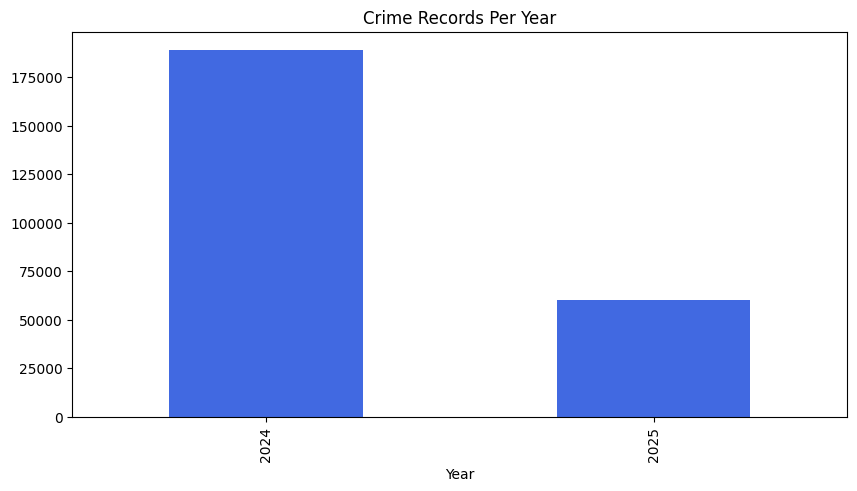

In [8]:
crimes_per_year = ch_crimes.groupby("Year").size()
crimes_per_year.plot(
    kind='bar',
    title="Crime Records Per Year",
    color='royalblue',
    figsize=(10,5)
)
plt.show()

## **🎯 Insights**

1. The analysis shows that 2024 had the highest number of recorded crimes, reaching 188,918 incidents.

2. While 2024 recorded the peak, 2025 is already showing a high number of crimes as well, which suggests that crime levels remain consistently high.

<h1></h1>

<h2>Q2: Which month usually has the most crimes on both year (2024-2025)? </h2>

In [9]:
ch_crimes["Year"] = pd.to_datetime(ch_crimes["Date"]).dt.year
ch_crimes["Month"] = pd.to_datetime(ch_crimes["Date"]).dt.month

crimes_per_month = ch_crimes.groupby(["Year", "Month"]).size().unstack()
crimes_per_month

Month,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
2024,6562,5894,6001,17616,20278,19751,20577,19492,19362,19210,16969,17206
2025,13782,11499,14341,2355,2355,2213,2380,2419,2328,2446,2420,1667


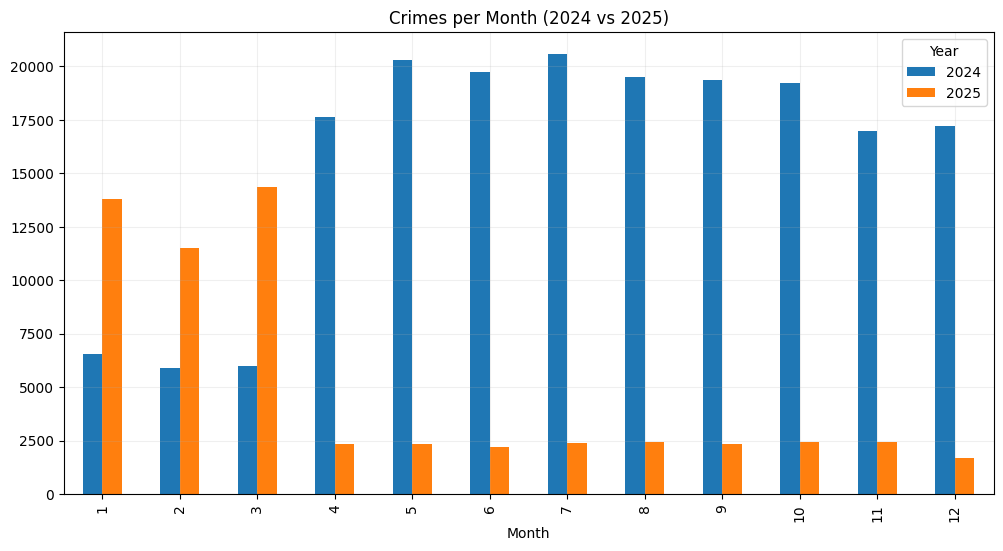

In [10]:
crimes_per_month.T.plot(
    kind="bar",
    figsize=(12,6),
    title="Crimes per Month (2024 vs 2025)"
)
plt.grid(alpha=0.2)
plt.show()

## **🎯 Insights**

3. The analysis shows that July 2024 recorded the highest number of crimes with 20,378 cases, followed closely by May and June.

4. In contrast, 2025 shows a sharp decline overall, with January and March having the highest crime counts but still far below 2024’s peak crime months.

5. According to the bar graph, crimes in 2024 are very high in the middle of the year, while in 2025, crime numbers are highest at the start of the year and then decline.


<h1></h1>

<h2>Q3: Which day of the week has the most crimes? </h2>

In [11]:
crimes_dow = ch_crimes.groupby(["DayOfWeek"]).size().reset_index()
crimes_dow

,DayOfWeek,0
0,0,36262
1,1,35580
2,2,34429
3,3,35007
4,4,37498
5,5,35666
6,6,34681


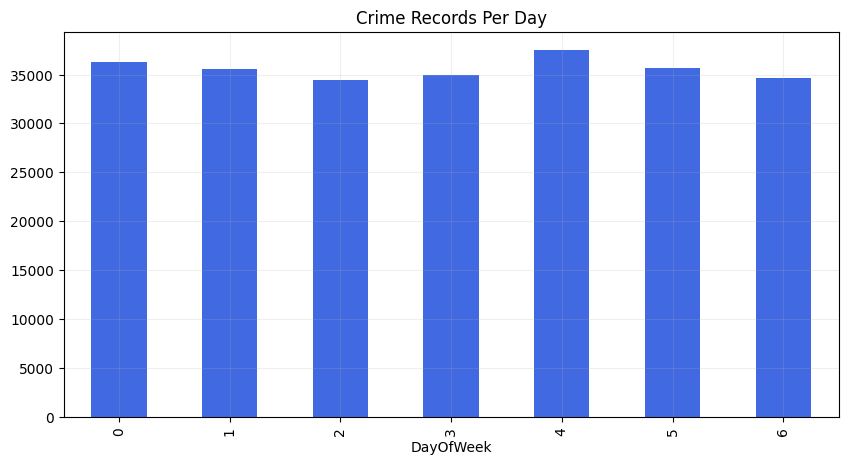

In [12]:
crimes_dow = ch_crimes.groupby("DayOfWeek").size()
crimes_dow.plot(
    kind='bar',
    title="Crime Records Per Day",
    color='royalblue',
    figsize=(10,5)
)
plt.grid(alpha=0.2)
plt.show()

## **🎯 Insights**

6. The analysis shows that Day 4 (Friday) recorded the highest number of crimes with 37,498 cases.

7. In comparison, Day 2 (Wednesday) had the lowest with 34,429 cases.

8. According to the bar chart, crime levels in Chicago remain fairly steady across the week, but Friday had the most crime activity.


<h1></h1>

<h2>Q4: Which year had the highest arrest rate? </h2>

In [13]:
arrest_rate_per_year = ch_crimes.groupby("Year")["Arrest"].mean().reset_index()
arrest_rate_per_year

,Year,Arrest
0,2024,0.134540
1,2025,0.175816


<Axes: title={'center': 'Crime Arrest Rate per Year'}, xlabel='Year'>

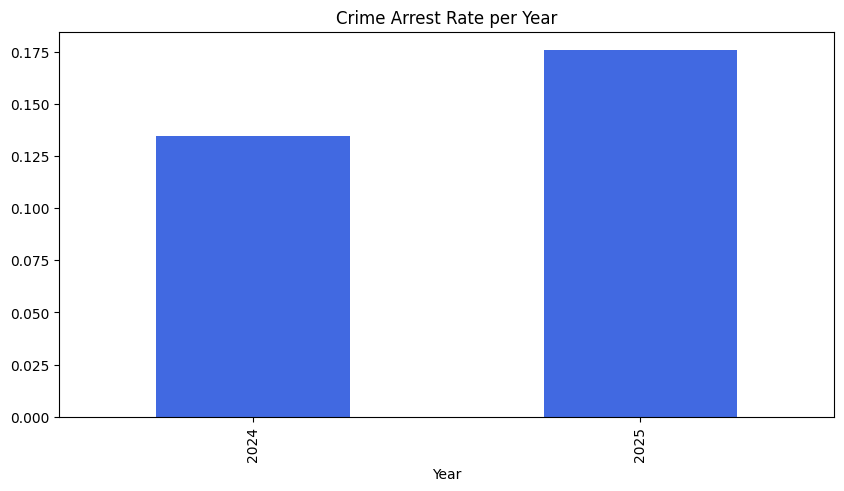

In [14]:
crimes_per_year = ch_crimes.groupby("Year")['Arrest'].mean()
crimes_per_year.plot(
    kind='bar',
    title="Crime Arrest Rate per Year",
    color='royalblue',
    figsize=(10,5)
)

<Axes: title={'center': 'Arrest Rate by Year'}>

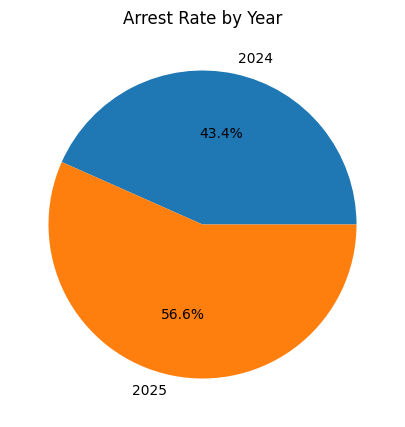

In [15]:
accidents_area = ch_crimes.groupby("Year")['Arrest'].mean()
accidents_area.plot(kind='pie', autopct='%1.1f%%', ylabel='', figsize=(10,5), title="Arrest Rate by Year")

## **🎯 Insights**

9. The analysis shows that 2025 had the highest arrest rate at 17.58%, compared to 13.45% in 2024. This suggests that arrests were more frequent in 2025 even though the total number of crimes on that year was lower.

10. According on the bar graph, 2025 showed better results in arresting criminals than year 2024.
 
11. Furthermore, the pie chart shows that 2025 really had the higher arrest rate, making up 56.6% of arrests. Meanwhile, 2024 accounted for 43.4%, which is lower compared to 2025.

12. Based on both visualizations, we can positively conclude that the arrest rate in Chicago really improved in 2025 compared to 2024.


<h1></h1>

<h2>Q5: What is the most common type of crime in Chicago? </h2>

In [16]:
crime_types = ch_crimes["Primary Type"].value_counts().reset_index().head(10)
crime_types

,Primary Type,count
0,THEFT,59201
1,BATTERY,44579
2,CRIMINAL DAMAGE,27094
3,ASSAULT,22615
4,MOTOR VEHICLE THEFT,19604
5,OTHER OFFENSE,16781
6,DECEPTIVE PRACTICE,14991
7,BURGLARY,8443
8,ROBBERY,8200
9,WEAPONS VIOLATION,7164


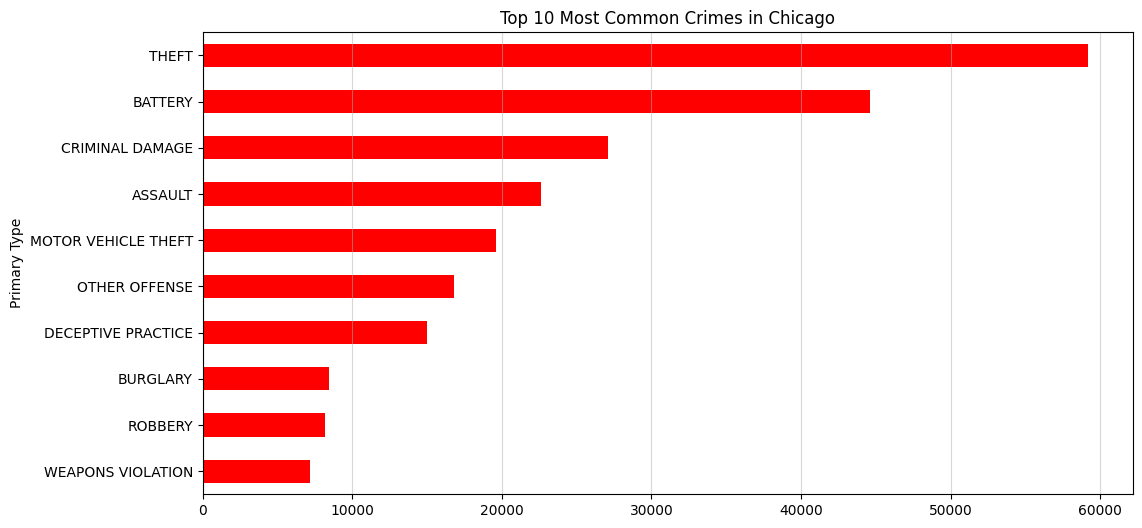

In [17]:
crime_types = ch_crimes['Primary Type'].value_counts().head(10)
crime_types_sorted = crime_types.sort_values(ascending=True)

crime_types_sorted.plot(
    kind="barh",
    figsize=(12,6),
    title="Top 10 Most Common Crimes in Chicago",
    color='red'
)
plt.grid(axis='x', alpha=0.5)
plt.show()

## **🎯 Insights**

13. The analysis shows that theft is the most common type of crime in Chicago, with over 58,000 recorded cases, making it significantly higher compared to other crime categories.

14. We can also see that battery ranks second, with more than 44,000 cases, followed by criminal damage and assault, both of which also have relatively high frequencies.

15. Based on the bar graph, theft and battery together dominate the crime statistics in Chicago, accounting for the majority of incidents compared to other crimes such as burglary, robbery, and weapons violations which have noticeably lower counts.

<h1></h1>

<h2>Q6: Which type of crime has the highest arrest rate in Chicago? </h2>

In [18]:
crime_arrest_rate = ch_crimes.groupby("Primary Type")["Arrest"].mean().sort_index().head(10)
crime_arrest_rate

Primary Type
ARSON                                0.055310
ASSAULT                              0.110546
BATTERY                              0.171538
BURGLARY                             0.049272
CONCEALED CARRY LICENSE VIOLATION    0.987952
CRIMINAL DAMAGE                      0.040858
CRIMINAL SEXUAL ASSAULT              0.025429
CRIMINAL TRESPASS                    0.292567
DECEPTIVE PRACTICE                   0.029751
GAMBLING                             1.000000
Name: Arrest, dtype: float64

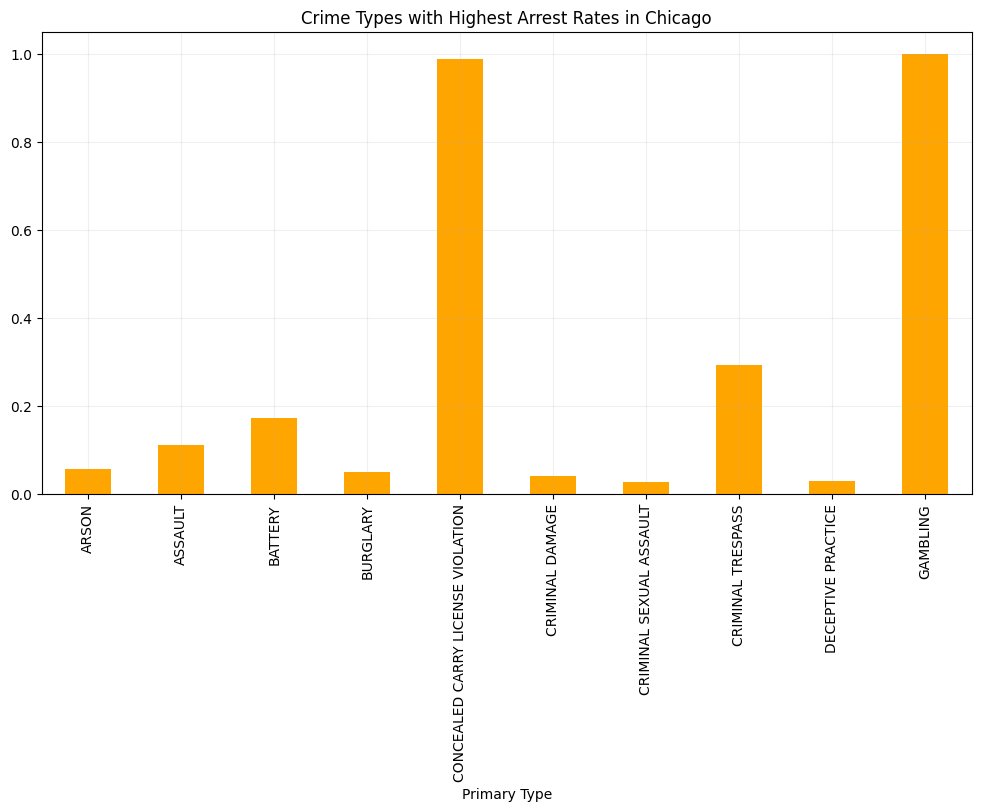

In [19]:
crime_arrest_rate.plot(
    kind="bar", 
    figsize=(12,6), 
    title="Crime Types with Highest Arrest Rates in Chicago",
    color='orange'
)
plt.grid(alpha=0.2)
plt.show()

## **🎯 Insights**

16. The analysis shows that gambling and concealed carry license violation have the highest arrest rates, with nearly 100% of cases leading to arrests.

17. We can also see on the given data and visualization that crimes such as criminal trespass and battery show moderate arrest rates, while most other crimes like arson and assault have relatively lower arrest rates.

18. Based the bar graph, the arrest rates are extremely concentrated in specific crimes like gambling and weapon-related offenses, which suggests that enforcement in Chicago is very much stricter for these type of crimes compared to common crimes like burglary or criminal damage.

<h1></h1>

<h2> Q7: Which hour of the day do crimes often happen?</h2>

In [20]:
crimes_per_hour = ch_crimes["Hour"].value_counts().reset_index()
crimes_per_hour

,Hour,count
0,0,16752
1,12,14247
2,17,13566
3,15,13511
4,16,13288
5,18,13286
6,19,12902
7,20,12460
8,14,11936
9,21,11534


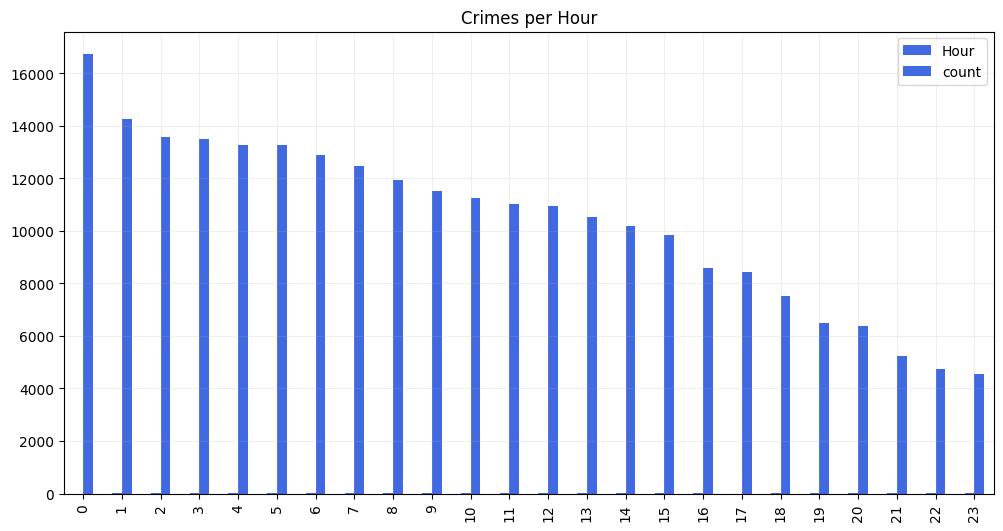

In [21]:
crimes_per_hour.plot(
    kind="bar", 
    figsize=(12,6), 
    title="Crimes per Hour",
    color='royalblue'
)
plt.grid(alpha=0.2)
plt.show()

## **🎯 Insights**

19. The hour with the highest crime recorded is during midnight (00:00 or 12:00 am) with a crime record of 16,752 incidents, suggesting that crime activity peaks right at the start of the day.

20. From 6:00 AM onwards, crime counts start to decline gradually, with afternoon and evening hours (12:00 pm – 20:00 pm) having significantly fewer incidents.

21. The lowest crime frequency occurs around 23:00 (11 PM), with just 4,551 crimes recorded, showing a sharp drop after the evening.

22. Overall, the trend on this analysis shows that crimes in Chicago is most common happens during at night and early morning, while daytime hours have fewer recorded crimes.

<h1></h1>

<h2> Q8: Which type of crimes has the lowest rate of arrests?</h2>

In [22]:
lowrate_crime = ch_crimes.groupby("Primary Type")["Arrest"].mean().sort_values().head(10)
lowrate_crime

Primary Type
HUMAN TRAFFICKING          0.000000
CRIMINAL SEXUAL ASSAULT    0.025429
INTIMIDATION               0.027586
MOTOR VEHICLE THEFT        0.027698
DECEPTIVE PRACTICE         0.029751
CRIMINAL DAMAGE            0.040858
BURGLARY                   0.049272
ARSON                      0.055310
KIDNAPPING                 0.057143
STALKING                   0.059615
Name: Arrest, dtype: float64

<Axes: title={'center': 'Crime Types with Lowest Arrest Rates'}, xlabel='Primary Type'>

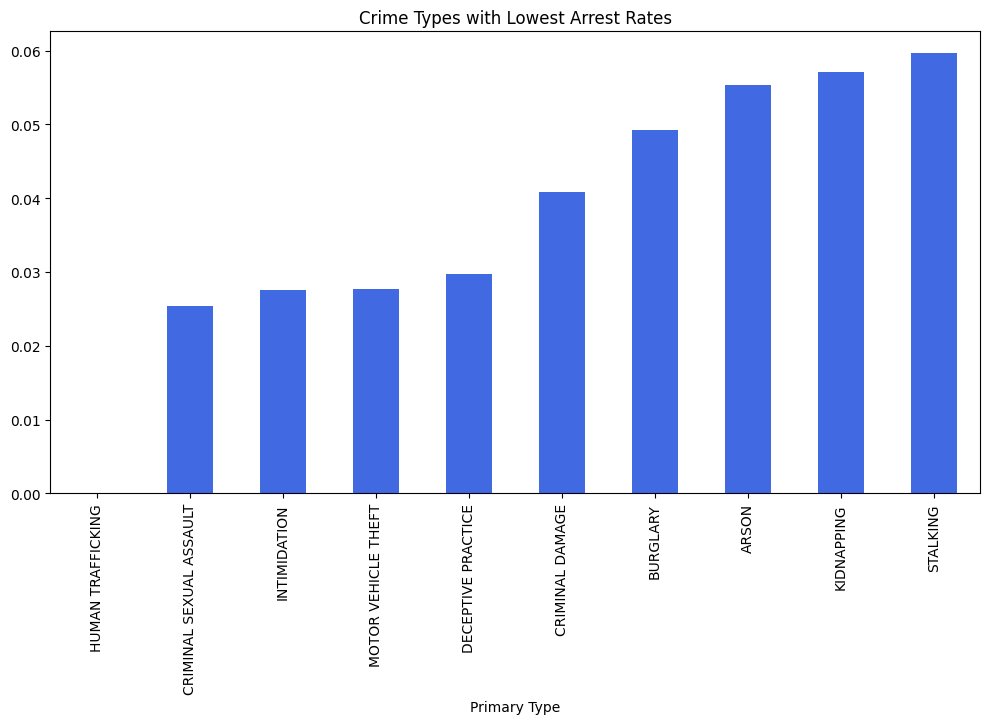

In [23]:
lowrate_crime.plot(
    kind="bar", 
    figsize=(12,6), 
    title="Crime Types with Lowest Arrest Rates",
    color='royalblue'
)

## **🎯 Insights**

23. The analysis shows that human trafficking has the lowest arrest rate in Chicago, with no recorded arrests.

24. We can also see on the bar graph that criminal sexual assault, intimidation, and motor vehicle theft have very low arrest rates, all below 3%

25. According to the results, property-related crimes such as burglary and criminal damage also show low arrest rates, meaning that many of these cases end without arrests.

<h1></h1>

<h2> Q9: Which district in Chicago has the most crimes recorded?</h2>

In [24]:
district_crimes = ch_crimes.groupby("District").size().reset_index(name='count')
district_crimes

,District,count
0,1,14409
1,2,12848
2,3,12545
3,4,13318
4,5,9883
5,6,14157
6,7,10520
7,8,16691
8,9,10910
9,10,10133


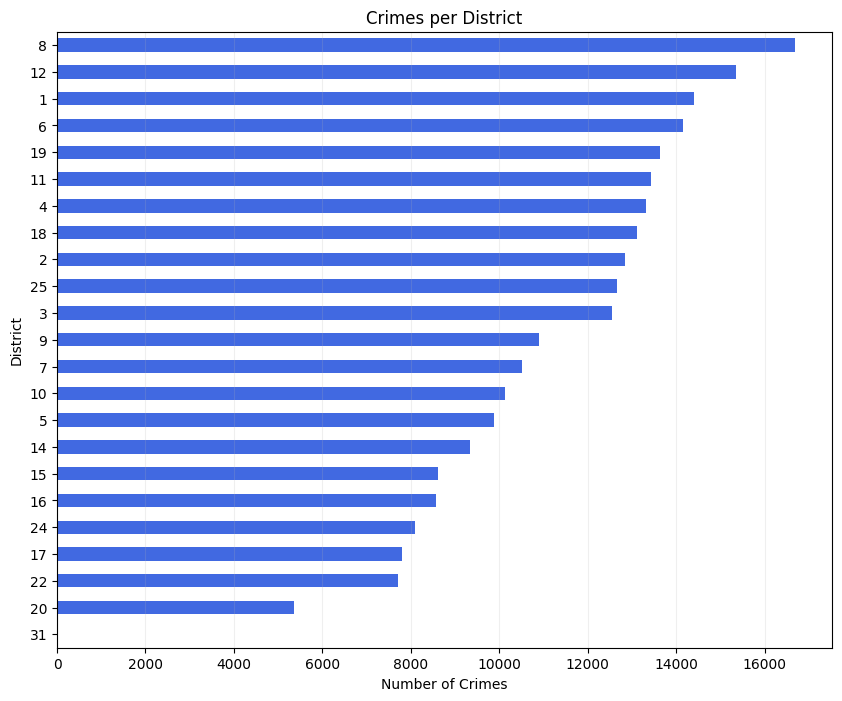

In [25]:
district_crimes = ch_crimes.groupby("District").size()

ax = district_crimes.sort_values(ascending=True).plot(
    kind="barh", 
    figsize=(10, 8), 
    title="Crimes per District",
    color='royalblue'
)

plt.xlabel("Number of Crimes")
plt.ylabel("District")
plt.grid(axis='x', alpha=0.2)
plt.show()

## **🎯 Insights**

26. The analysis shows that District 8 has the highest number of crimes recorded with 16,691 cases, making it the most crime-affected area in Chicago.

27. The Districts 12 and 1 follow closely with 15,355 and 14,409 cases, which shows that these areas in Chicago also face high crime levels.

28. Based on the bar graph and the result, District 31 has the lowest crime count with only 19 cases, which is significantly lower compared to other districts.

<h1></h1>

<h2> Q10: Which month has the most theft cases in both years 2024 & 2025?</h2>

In [26]:
monthly_theft = ch_crimes.groupby(['Year', 'Month']).size().unstack(level=0)
monthly_theft

Year,2024,2025
Month,,
1,6562,13782
2,5894,11499
3,6001,14341
4,17616,2355
5,20278,2355
6,19751,2213
7,20577,2380
8,19492,2419
9,19362,2328


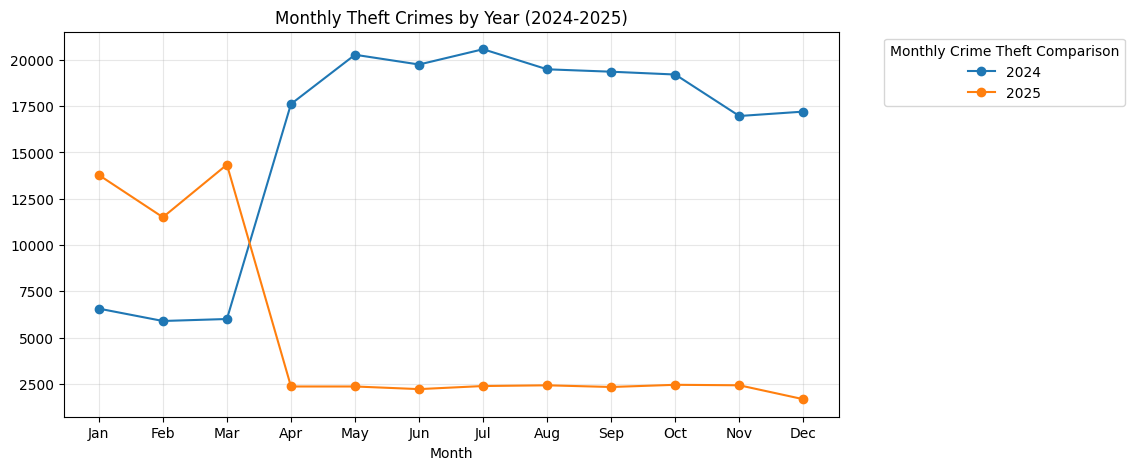

In [27]:
monthly_theft = ch_crimes.groupby(['Year', 'Month']).size()
monthly_theft = monthly_theft.unstack(level=0)

monthly_theft.plot(
    marker='o', 
    figsize=(10, 5),
    title='Monthly Theft Crimes by Year (2024-2025)'
)
plt.xticks(range(1, 13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.legend(title='Monthly Crime Theft Comparison', bbox_to_anchor = (1.05,1), loc='upper left')
plt.grid(alpha=0.3)
plt.show()

## **🎯 Insights**

29. The analysis shows that July 2024 recorded the highest number of theft cases with 20,577 incidents, making it the peak month for theft in that year. In contrast, February 2024 had the lowest record of theft count with only 5,894 cases, which is significantly lower compared to other months.

30. For 2025, the month of March recorded the highest number of theft cases at 14,341 incidents, followed by February with 11,499 cases and January with 13,782 cases.

32. Based on the line chart the theft activity in 2025 was particularly high in the first quarter of the year (Jan–Mar), compared to 2024 where summer had the highest cases of theft activities.

<h1></h1>

<h2> Q11: Which year recorded the highest number of domestic crimes in Chicago? </h2>

In [28]:
domestic_crimes = ch_crimes[ch_crimes['Domestic'] == True]
domestic_by_year = domestic_crimes.groupby('Year').size().reset_index(name='Count')
print(domestic_by_year)

   Year  Count
0  2024  34773
1  2025  11574


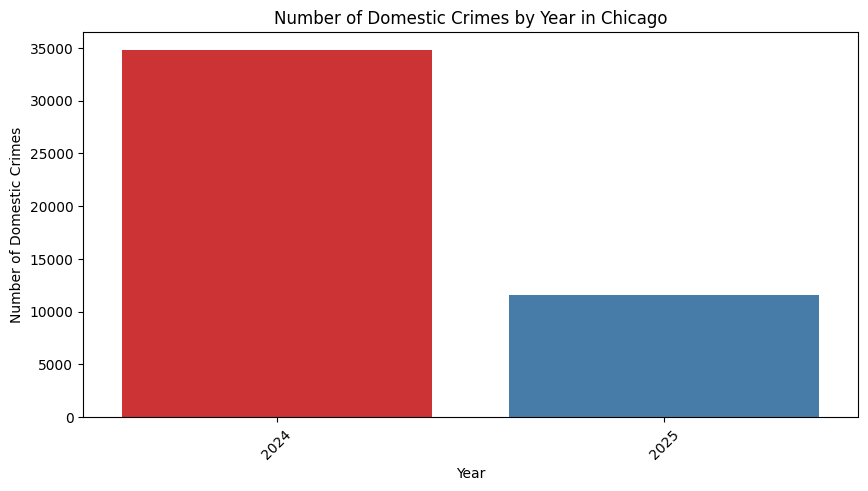

In [29]:
plt.figure(figsize=(10,5))
sns.barplot(x='Year', y='Count', data=domestic_by_year, palette='Set1')

plt.title('Number of Domestic Crimes by Year in Chicago')
plt.xlabel('Year')
plt.ylabel('Number of Domestic Crimes')
plt.xticks(rotation=45)
plt.show()

## **🎯 Insights**

32. Based on the results of the analysis the year 2024 recorded the highest number of domestic crimes with 34,773 cases, showing a significantly higher frequency compared to 2025.

33. In 2025, domestic crimes dropped sharply to 11,574 cases, which is almost a 67% decrease from the previous year, which suggest that domestic crimes in Chicago are on a downward trend.


<h1></h1>

<h2> Q12: Which location description has the highest record of crimes in Chicago?</h2>

In [30]:
location_counts = ch_crimes['Location Description'].value_counts().reset_index().head(10)
location_counts

,Location Description,count
0,STREET,66040
1,APARTMENT,47787
2,RESIDENCE,29776
3,SIDEWALK,13265
4,SMALL RETAIL STORE,9858
5,PARKING LOT / GARAGE (NON RESIDENTIAL),8350
6,RESTAURANT,6094
7,DEPARTMENT STORE,5768
8,ALLEY,5695
9,OTHER (SPECIFY),4072


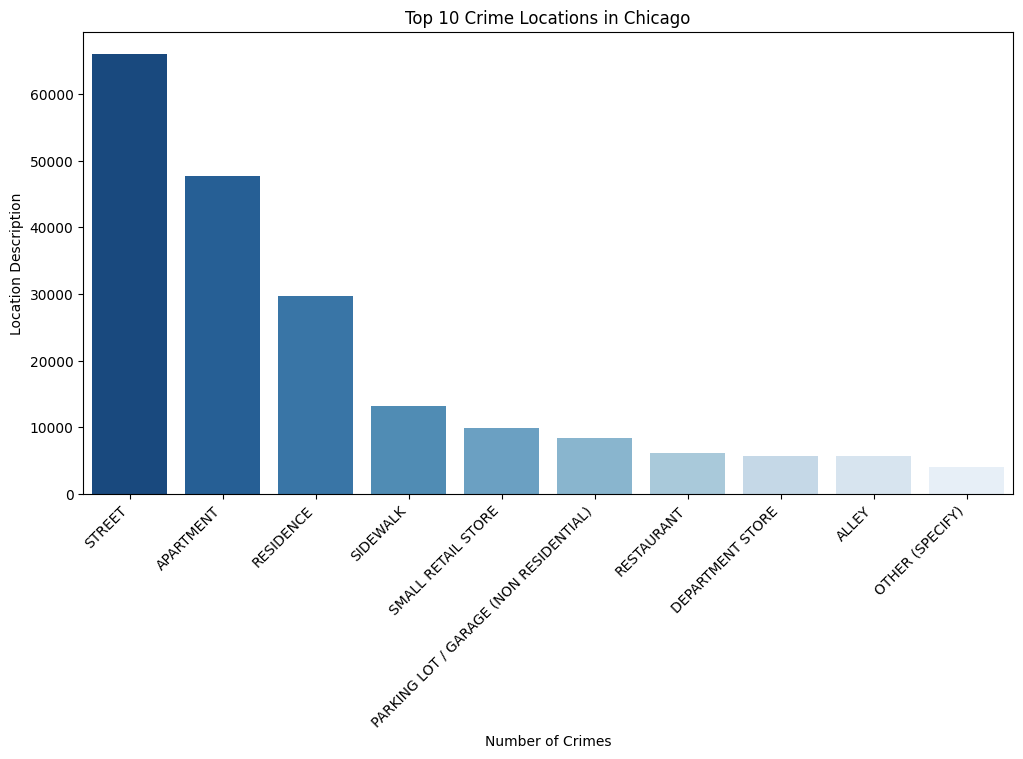

In [31]:
top10_locations = ch_crimes['Location Description'].value_counts().head(10).index
top_crimes = ch_crimes[ch_crimes['Location Description'].isin(top10_locations)]

plt.figure(figsize=(12,6))
sns.countplot(
    data=top_crimes,
    x='Location Description',
    order=top10_locations,
    palette="Blues_r"
)

plt.xticks(rotation=45, ha='right')
plt.title("Top 10 Crime Locations in Chicago")
plt.xlabel("Number of Crimes")
plt.ylabel("Location Description")
plt.show()

## **🎯 Insights**

34. The analysis shows that Streets have the highest number of crimes in Chicago with 66,040 cases, making it the most crime-affected location overall.

35. We can actually see on the results and countplot that Apartments and Residences are also highly prone to criminal activities after public spaces like streets.

36. On the other hand, places like Department Stores, Alleys, and Other (Specify) locations have the least record of crime activities compared to other major locations.
